# Métodos para el Cálculo de Autovalores

## Contenido
* [Semana 1](#Single): Métodos iterativos para el cálculo de autovectores dominantes.
<ul>
<li>Método de la potencia.</li>
<li>Método de la potencia inversa (shift & invert).</li>
</ul>
* [Semana 2](#Full): Métodos para el cálculo del espectro completo de autovalores.

<ul>
<li> Empezamos importando los módulos necesarios y definiendo la matriz de la que queremos calcular los autovalores.
</ul>

In [56]:
import numpy as np
import scipy.linalg as sp
from tabulate import tabulate

v = np.random.rand(4)
A = np.reshape(v,(1,4)) # Matriz de 1 fila y 4 columnas (Vector fila)
B = np.reshape(v,(4,1)) # Matriz de 4 filas y 1 columna (Vector columna)
Matriz = np.matmul(B,A) # Matriz simétrica, el elemento (i,j) es v(i)*V(j) 

#print(tabulate(Matriz))

<ul>
<li> A continuación definimos algunas funciones útiles que vamos a usar
</ul>

In [57]:
def norm2(v):
    return np.sqrt(sum(v*v))

<a id='Single'></a>
## Métodos iterativos para el cálculo de un autovector.

Vamos a hacer una serie de suposiciones necesarias para garantizar que estos métodos funcionan adecuadamente.
En primer lugar consideramos una matriz $A \in \mathbb M_{n \times n}(\mathbb R)$ no singular, cuadrada, formada por coeficientes reales y <a href="https://es.wikipedia.org/wiki/Matriz_diagonalizable">diagonalizable</a>.

En segundo lugar vamos a considerar que los autovalores cumplen:

$$|\lambda_1| \gt |\lambda_2| \ge |\lambda_3| \ge \dots \ge |\lambda_n|$$

Es decir, que tenemos un autovalor $\lambda_1$ que llamaremos dominante, que es mayor en valor absoluto que el resto. Además vamos a considerar que la multiplicidad geométrica (no solo la <a href="https://aga.frba.utn.edu.ar/multiplicidades-algebraica-y-geometrica-de-un-autovalor/">algebraica</a>) es uno. Eso implica que sólo tiene asociado un autovector, que llamaremos autovector dominante. 

Bajo estas condiciones, para calcular el $\textbf{autopar}$ (autovalor y autovector asociado) podemos utilizar el método de la potencia.
    

### Método de la potencia.

Sea $\mathbf{x} \in \mathbb R^n$, entonces, por ser $A$ diagonalizable, existe una base del espacio vectorial $\mathbb R^n$ formada por autovectores de $A$, $B_v = \{\vec{v}_1, \vec{v}_2, \vec{v}_3, \dots, \vec{v}_n \}$ con $A \vec{v}_i = \lambda_i \vec{v}_i$, de modo que:
    
$$\mathbf{x} = c_1\vec{v}_1 + c_2\vec{v}_2 + \dots + c_n\vec{v}_n$$
    
Entonces:
    
$$A\mathbf{x} = c_1A\vec{v}_1 + c_2A\vec{v}_2 + \dots + c_nA\vec{v}_n=c_1\lambda_1\vec{v}_1 + c_2\lambda_2\vec{v}_2 + \dots + c_n\lambda_n\vec{v}_n$$
    
Considerando que $|\lambda_1| \gt |\lambda_2|  \ge \dots \ge |\lambda_n|$ podemos reescribir:
    
$$A\mathbf{x} = \lambda_1 \left( c_1\vec{v}_1 + c_2\dfrac{\lambda_2}{\lambda_1}\vec{v}_2 + \dots + c_n\dfrac{\lambda_n}{\lambda_1}\vec{v}_n \right)$$
    
Multiplicando de forma iterativa por la matriz $A$ obtenemos el siguiente proceso iterativo:

* $\mathbf{x}^1 = A\mathbf{x}$; 
* $\mathbf{x}^2 = A\mathbf{x}^1 = A^2\mathbf{x}$;
* ...
* $\mathbf{x}^p=A^p\mathbf{x} = \left(\lambda_{1}\right)^{p} \left( c_1\vec{v}_1 + c_2\left(\frac{\lambda_2}{\lambda_1}\right)^p\vec{v}_2 + \dots + c_n\left(\frac{\lambda_n}{\lambda_1}\right)^p\vec{v}_n \right)$
  
    
Como $|\lambda_1|\gt |\lambda_i| \quad   \forall i=2,\cdots,n$  los cocientes de autovalores se hacen cada vez más pequeños a medida que aumenta el exponente $p$. Por ello se espera que en el límite:
    
$$A^p\mathbf{x} \sim c_1 \left(\lambda_{1}\right)^{p} \vec{v}_1$$
    
Es decir, que, a medida que multiplicamos sucesivamente por la matriz $A$, la operación nos lleve en la dirección del autovalor dominante. 
Este resultado teórico tiene algunos inconvenientes a la hora de implementarlo numéricamente. Uno de los más típicos se debe a la inestabilidad numérica causada por el aumento exponencial de $\left(\lambda_{1}\right)^{p}$ y el decaimiento tambien exponencial de $\left(\dfrac{\lambda_i}{\lambda_1}\right)^p$. Este inconveniente se puede solucionar facilmente normalizando el resultado de $\mathbf{x}^j=A\mathbf{x}^{j-1}$ en cada iteración.
    
El método de la potencia converge al autovector dominante normalizado $v_1$, para calcular el autovalor correspondiente podemos emplear el cociente de Rayleigh:
    
$$ \lambda_1 = \dfrac{\vec{v}_1^T A\vec{v}_1}{\vec{v}_1^T\vec{v}_1}=\dfrac{\vec{v}_1^T \lambda_1\vec{v}_1}{\vec{v}_1^T\vec{v}_1}$$
    
Veamos como implementarlo:

In [58]:
def potencia(A):
    if A.shape[0]!=A.shape[1]: return None  #Comprobamos que la matriz sea cuadrada
    n = A.shape[0] 
    x = np.random.rand(n)     # Tomamos un vector aleatorio para empezar a iterar
    x = x/norm2(x)            # Normalizamos dicho vector
    
    convergencia = False
    while not convergencia:   # Proceso iterativo hasta la convergencia
        x1 = np.matmul(A,x)

        x1 = x1/norm2(x1)
        if norm2(x1-x)<0.0000001:    # Convergencia alcanzada en el autovector
            convergencia = True
            eigenvalue = np.dot(x1,np.matmul(A,x1))
        x = x1.copy()
    
    return eigenvalue,x1      # Devolvemos como resultado el autovalor y autovector dominantes

Pongamos un ejemplo sencillo para ver como funciona.

\begin{align}
A = 
\begin{pmatrix}
1 & 1 & 2\\
1 & -1 & 1\\
2 & 1 & -1
\end{pmatrix}
\end{align}

Hemos escogido una matriz real, simétrica y por tanto con todos los autovalores reales. 
Los autovalores de esta matriz son: $\lambda_1 = 2.74; \lambda_2 = -2.35; \lambda_3 = -1.4$.
Lo podemos comprobar mediante la funcion <i> eigvals()</i> del módulo <i>scipy.linalg</i> que nos devuelve los autovalores de una matriz


In [59]:
A = np.array([[1.,1.,2.],[1.,-1.,1.],[2.,1.,-1.]])
print(sp.eigvals(A))

[ 2.74482608+0.j -1.39593186+0.j -2.34889422+0.j]


Apliquemos el método de la potencia para calcular el par dominante.

In [60]:
eigval,eigvec = potencia(A)
print(f'Autovalor dominante: {eigval}, autovector: {eigvec}')

Autovalor dominante: 2.7448260776819144, autovector: [0.78579649 0.34661858 0.51222986]


#### Criterio de Convergencia.

El criterio de parada escogido en la implementación inicial ha sido:
$$||\mathbf{x}^j-\mathbf{x}^{j-1}|| \lt \varepsilon$$

Es decir que el módulo de la diferencia entre dos aproximaciones consecutivas del autovector sea menor que un valor pequeño $\varepsilon$.

Este criterio da problemas si el autovalor dominante es negativo. En cada iteración el vector cambiará de sentido (manteniendo la dirección) lo que hará que no se cumpla el criterio de convergencia. 
Para comprobarlo basta que cambies el signo del elemento $A_{1,1}$. 

\begin{align}
A = 
\begin{pmatrix}
-1 & 1 & 2\\
1 & -1 & 1\\
2 & 1 & -1
\end{pmatrix}
\end{align}

Ahora el autovalor dominante es $\lambda_1 = -3$ y el proceso iterativo devuelve:

<ul>
...    
<li>Iteración:  23669

x1   =  (-7.07106781e-01,  3.70074342e-17,  7.07106781e-01)</li>
<li>Iteración:  23670

x1   =  ( 7.07106781e-01,  3.70074342e-17, -7.07106781e-01)</li>
<li>Iteración:  23671

x1   =  (-7.07106781e-01,  3.70074342e-17,  7.07106781e-01)</li>
<li>Iteración:  23672

x1   =  ( 7.07106781e-01,  3.70074342e-17, -7.07106781e-01)</li>
...
</ul>
El vector obtenido es el mismo, simplemente cambia el signo, pero el criterio de convergencia elegido no se cumple.

Se puede corregir usando como criterio que el coseno del ángulo que forman las aproximaciones sucesivas sea 1 o -1. 

$$|1-|\cos\left(\text{ang}  \{  \mathbf{x}^j,\mathbf{x}^{j-1} \}\right)||\lt \varepsilon$$

Pero, por lo general, para evitar ese problema se suele utilizar el comportamiento de las aproximaciones del autovalor dominante como condición de parada. 

$$|\lambda_1^j-\lambda_1^{j-1}| \lt \varepsilon$$

In [61]:
def potencia(A):
    if A.shape[0]!=A.shape[1]: return None     # Comprobamos que la matriz sea cuadrada
    n = A.shape[0] 
    x = np.random.rand(n)                      # Tomamos un vector aleatorio para empezar a iterar
    x = x/norm2(x)                             # Normalizamos dicho vector
    eigvalue = np.dot(x,np.matmul(A,x))        # Aproximación inicial del autovalor 
    convergencia = False
    
    while not convergencia:
        x1 = np.matmul(A,x)                    # Nueva aproximación a partir del producto matriz-vector
        x1 = x1/norm2(x1)
        eigvalue1 = np.dot(x1,np.matmul(A,x1))
        if abs(eigvalue1-eigvalue)<0.0001:     # Criterio de parada basado en la convergencia del autovalor  
            convergencia = True
    
        x = x1.copy()
        eigvalue = eigvalue1
    
    return eigvalue1,x1                        # Devolvemos como resultado el autovalor y autovector dominantes

In [62]:
# Problemas de convergencia
A = np.array([[-1.,1.,2.],[1.,-1.,1.],[2.,1.,-1.]])
eigval,eigvec = potencia(A)
print(f'Autovalor dominante: {eigval}, autovector: {eigvec}')

Autovalor dominante: -2.9999706078170822, autovector: [ 0.70832342  0.00198055 -0.70588527]


### Método de la potencia inversa. (shift & invert)

Una pequeña variación del método de la potencia nos va a servir para calcular el autovalor más proximo a cero en valor absoluto y su autovector asociado. Para ello basta recordar de Algebra Lineal que si $ \lambda $ es un autovalor de la matriz $ A $ entonces $ \dfrac{1}{\lambda} $ es autovalor de la inversa $ A^{-1} $. Veamoslo:

Sea $ A \in \mathbb M_{n \times n}(\mathbb R) $ matriz cuadrada, no singular de números reales y sean: $ \left( \lambda, \vec{v} \right) $ un par autovalor-autovector de dicha matriz. Entonces:

$$
A\vec{v} = \lambda \vec{v} \rightarrow A^{-1}A\vec{v} = \lambda A^{-1}\vec{v} \rightarrow \dfrac{1}{\lambda}\vec{v} =  A^{-1}\vec{v}
$$

y por tanto $ \dfrac{1}{\lambda} $ es autovalor de la matriz inversa $ A^{-1} $ asociado al mismo autovector $ \vec{v} $.

Como además, si $ |\lambda_1| \gt |\lambda_2| \ge |\lambda_3| \ge \dots \gt |\lambda_n| $ se cumple que $ |\dfrac{1}{\lambda_1}| \lt |\dfrac{1}{\lambda_2}| \le |\dfrac{1}{\lambda_3}| \le \dots \lt |\dfrac{1}{\lambda_n}| $ Basta repetir el proceso iterativo del método de la potencia con $ A^{-1} $ en lugar de $ A $ para hallar el autovector dominante de $ A^{-1} $ que será el asociado al autovector dominante $ \dfrac{1}{\lambda_n} $.

Habremos encontrado el autovector de  $ A $ asociado al autovalor $ \lambda_n $, el más proximo a 0.

A la hora de implementar este método tendremos en cuenta que el cálculo de la inversa es costoso y por tanto en lugar de iterar $ \mathbf{x}^j=A^{-1}\mathbf{x}^{j-1} $ haremos $ A\mathbf{x}^j=\mathbf{x}^{j-1} $ lo que supone resolver un sistema lineal en cada paso. 

No solo eso, como la matriz $ A $ del sistema lineal permanece constante en todas las iteraciones vamos a utilizar lo aprendido en el tema anterior y separaremos la resolución en 3 etapas. La factorización LU se realiza una única vez fuera del bucle de las iteraciones mientras que en cada paso solo tenemos que resolver los dos sistemas triangulares. 

In [63]:
def potencia_inversa(A):
    if A.shape[0]!=A.shape[1]: return None         # Comprobamos que la matriz sea cuadrada
    n = A.shape[0] 
    x = np.random.rand(n)                          # Tomamos un vector aleatorio para empezar a iterar
    x = x/norm2(x)                                 # Normalizamos dicho vector
    eigvalue = np.dot(x,np.matmul(A,x))            # Aproximación inicial del autovalor usando A
    convergencia = False
    
    # FACTORIZACION LU de A
    P,L,U = sp.lu(A)
    
    while not convergencia:
        #Resuelvo los dos sistemas lineales triangulares
        y = sp.solve_triangular(L, np.matmul(P,x), lower=True)
        x1 = sp.solve_triangular(U, y, lower=False)
        
        x1 = x1/norm2(x1)
        eigvalue1 = np.dot(x1,np.matmul(A,x1))     # Aproximación del autovalor asociado al autovector menos dominante usando A
        if abs(eigvalue1-eigvalue)<0.0001:         # Criterio de parada basado en la convergencia del autovalor
            convergencia = True
    
        x = x1.copy()
        eigvalue = eigvalue1
     
    return eigvalue1,x1                            # Devolvemos como resultado el autovalor más próximo a 0 y su autovector 

Vamos a probarlo con la matriz $A$ cuyos autovalores eran: $\lambda_1 = 2.74; \lambda_2 = -2.35; \lambda_3 = -1.4$.

In [64]:
A = np.array([[1.,1.,2.],[1.,-1.,1.],[2.,1.,-1.]])
eigval,eigvec = potencia_inversa(A)
print(f'Autovalor más próximo a 0: {eigval}, autovector asociado: {eigvec}')

Autovalor más próximo a 0: -1.3959033372414353, autovector asociado: [-0.45807584  0.88178188  0.11237102]


#### Método de la potencia inversa con <i> shift</i>.

Una vez que hemos usado la potencia sobre la matriz inversa para calcular el autovalor más proximo a cero podemos modificarlo para calcular el autovalor más próximo a un valor dado. 
Basta comprobar que si $\mu$ es un autovalor de $A$ y $\vec{v}$ su autovector asociado, entonces la matriz $A-\alpha I$ tiene como autovalor $\mu-\alpha$ asociado al mismo autovector $\vec{v}$. 
$$   \left( A-\alpha I\right )\vec{v}= A\vec{v}-\alpha \vec{v} =\mu \vec{v} -\alpha \vec{v} = \left( \mu-\alpha \right)\vec{v}$$
    
Por tanto si aplicamos el metodo de la potencia inversa a la matriz $ A-\beta I$ hallaremos el autovector de la matriz $A$ cuyo autovalor está más proximo a $\beta$.
    
Al igual que antes la manera eficiente de implementarlo es a través de la resolución de un sistema lineal en cada paso separando la descomposición LU (única) de la resolución de los sistemas triangulares. 


In [65]:
def potencia_inversa_shift(A,beta):
    if A.shape[0]!=A.shape[1]: return None         # Comprobamos que la matriz sea cuadrada
    n = A.shape[0] 
    B = A-beta*np.eye(n)
    x = np.random.rand(n)                          # Tomamos un vector aleatorio para empezar a iterar
    x = x/norm2(x)                                 # Normalizamos dicho vector
    eigvalue = np.dot(x,np.matmul(A,x))            # Aproximación inicial del autovalor usando A
    convergencia = False
    # FACTORIZACION LU de B = A-betaI
    P,L,U = sp.lu(B)
    
    while not convergencia:
        #Resuelvo los dos sistemas lineales triangulares
        y = sp.solve_triangular(L, np.matmul(P,x), lower=True)
        x1 = sp.solve_triangular(U, y, lower=False)
        
        x1 = x1/norm2(x1)
        eigvalue1 = np.dot(x1,np.matmul(A,x1))     # Aproximación del autovalor asociado al autovector menos dominante usando A
        if abs(eigvalue1-eigvalue)<0.0001:         # Criterio de parada basado en la convergencia del autovalor
            convergencia = True
    
        x = x1.copy()
        eigvalue = eigvalue1
     
    return eigvalue1,x1                            # Devolvemos como resultado el autovalor más próximo a 0 y su autovector 

In [66]:
A = np.array([[1.,1.,2.],[1.,-1.,1.],[2.,1.,-1.]])
eigval,eigvec = potencia_inversa_shift(A,-2)
print(f'Autovalor más próximo a -2: {eigval}, autovector asociado: {eigvec}')

Autovalor más próximo a -2: -2.348858114107249, autovector asociado: [ 0.40803463  0.33185705 -0.85051669]


<a id='Full'></a>
> ## Métodos para el cálculo del espectro completo de autovalores.

## Introducción.


Vamos a centrarnos unicamente en el cálculo del espectro para **matrices reales, simétricas y con autovalores distintos**. Aunque parece una restricción muy fuerte existen numerosos problemas interesantes con esas características. Por ejemplo el PCA *Principal Component Analysis*, utilizado en problemas de reducción de dimensionalidad para compresión de información o reconocimiento de imágenes, precisa el calculo del espectro completo de la matriz de covarianza de un conjunto de datos siendo dicha matriz simétrica y definida positiva.

La simetría de la matriz nos permite asegurar que los autovalores van a ser reales. Además, al pedir que esos autovalores sean distintos entre sí podemos garantizar que los autovectores asociados sean ortogonales entre si.

Podemos demostrar esto último facilmente:
Operando podemos comprobar que si $A$ es una matriz real:

$$\left<A\vec{x},\vec{y}\right> = \left<\vec{x},A^T\vec{y}\right>$$

Si suponemos además que $\vec{x}$ e $\vec{y}$ son autovectores asociados a los autovalores distintos $\lambda$ y $\beta$ respectivamente:

$$\lambda\left<\vec{x},\vec{y}\right> = \left<\lambda\vec{x},\vec{y}\right>=\left<A\vec{x},\vec{y}\right>=\left<\vec{x},A^T\vec{y}\right>$$

Como $A$ es simétrica $A=A^T$, entonces:

$$\left<\vec{x},A^T\vec{y}\right>=\left<\vec{x},A\vec{y}\right>=\left<\vec{x},\beta\vec{y}\right>=\beta\left<\vec{x},\vec{y}\right>$$

Hemos probado que:

$$\lambda\left<\vec{x},\vec{y}\right> =\beta\left<\vec{x},\vec{y}\right> \longrightarrow (\lambda-\beta)\left<\vec{x},\vec{y}\right> = 0 $$

Como $\lambda \ne \beta$ para que se cumpla es necesario que $\left<\vec{x},\vec{y}\right> = 0$. Es decir que $\vec{x}$ e $\vec{y}$ sean ortogonales entre si.

En ese contexto intentaremos extender el método de la potencia para calcular el espectro completo de la matriz. Y veremos que podemos extender el método de la potencia de modo inteligente en este caso sencillo como hace el método de *Iteración Simultanea*. E iremos un paso más allá, aprovechando la idea que nos da la *Iteración Simultánea* para explicar uno de los métodos más utilizado para el cálculo del espectro completo, el algoritmo *QR*. Este algoritmo es equivalente a la *Iteración Simultánea* para matrices reales, simétricas con autovalores diferentes pero se puede utilizar también para el cálculo de autovalores y autovectores de matrices no simétricas o complejas. En cualquier caso estas variaciones van mucho más allá de los objetivos de este curso donde solo se pretende mostrar las versiones más sencillas de los algoritmos.

Antes de entrar en los métodos de cálculo de autovalores nos vamos a detener en una herramienta que va a ser de gran utilidad: la factorización *QR* de una matriz.


### Descomposición QR.  <i> QR-decomposition</i>.

La descomposición *QR* de una matriz $A \in \mathbb M_{n \times n}(\mathbb R)$  es una factorización de la forma:
$$A = QR$$
donde $Q$ es una matriz ortogonal y $R$ una matriz triangular superior. 
Recordad que una matriz ortogonal cumple: $Q^TQ = I$, es decir, su inversa es su traspuesta. Además, como consecuencia directa de que $Q^TQ = I$  las columnas de $Q$ son vectores ortogonales.

Geometricamente, si las columnas de $A$ son una base de $\mathbb R^n$ entonces las columnas de $Q$ son una base ortogonal de $\mathbb R^n$ y la matriz de cambio de base sería $R$.
Existen diferentes maneras de calcular la descomposición *QR* de una matriz $A$. Nos vamos a centrar en la que habéis visto en Álgebra que es el método de Gram-Schmidt. Este método tiene gran importancia académica pero no es el habitualmente usado por ser numericamente inestable. Esto quiere decir que los errores de precisión pueden provocar que los vectores que devuelve no sean ortogonales entre sí. Otros métodos con mejor comportamiento numérico son las transformaciones Householder o las rotaciones de Givens.

El método de Gram-Schmidt parte de un conjunto de vectores linealmente independientes entre si. El primero es normalizado antes de añadirlo a la nueva base ortogonal. A partir de aquí a cada vector del conjunto original se le resta su proyección ortogonal sobre los ya incluidos en la nueva base antes de añadirlo. Se puede normalizar cada vector para obtener una base ortonormal.

$$B = \{ \vec{v}_1, \vec{v}_2, \vec{v}_3,\dots, \vec{v}_n\}$$
$$B^{\perp} = \{ \vec{e}_1, \vec{e}_2, \vec{e}_3,\dots, \vec{e}_n\}$$
con

\begin{align*}
&\vec{u}_1 = \vec{v}_1 \longrightarrow \vec{e}_1 = \dfrac{\vec{u}_1}{||\vec{u}_1||} \\
&\vec{u}_2 = \vec{v}_2-\mbox{proy}_{\vec{e}_1}(\vec{v}_2) \longrightarrow \vec{e}_2 = \dfrac{\vec{u}_2}{||\vec{u}_2||} \\
&\vec{u}_3 = \vec{v}_3-\mbox{proy}_{\vec{e}_1}(\vec{v}_3)-\mbox{proy}_{\vec{e}_2}(\vec{v}_3) \longrightarrow \vec{e}_3 = \dfrac{\vec{u}_3}{||\vec{u}_3||}\\
&\dots \\
&\vec{u}_n = \vec{v}_n-\mbox{proy}_{\vec{e}_1}(\vec{v}_n)-\dots-\mbox{proy}_{\vec{e}_{n-1}}(\vec{v}_n) \longrightarrow \vec{e}_n = \dfrac{\vec{u}_n}{||\vec{u}_n||}
\end{align*}

Geometricamente:
<div>
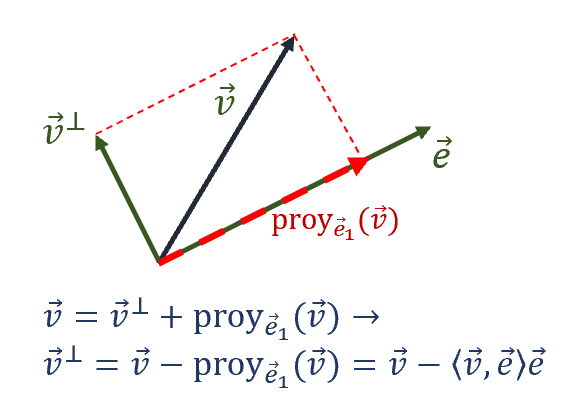
</div>

Si partimos de las columnas de la matriz $A$:

\begin{align}
A = 
\begin{pmatrix}
\vdots & \vdots& \vdots & \vdots\\
a_1 & a_2 &\dots & a_n\\
\vdots & \vdots & \vdots & \vdots
\end{pmatrix}
\end{align}

Entonces:

\begin{align*}
&\vec{u}_1 = \vec{a}_1 \longrightarrow \vec{e}_1 = \dfrac{\vec{u}_1}{||\vec{u}_1||} \\
&\vec{u}_2 = \vec{a}_2-\left<\vec{a}_2,\vec{e}_1\right> \vec{e}_1 \longrightarrow \vec{e}_2 = \dfrac{\vec{u}_2}{||\vec{u}_2||} \\
&\vec{u}_3 = \vec{a}_3-\left<\vec{a}_3,\vec{e}_1\right> \vec{e}_1-\left<\vec{a}_3,\vec{e}_2\right> \vec{e}_2 \longrightarrow \vec{e}_3 = \dfrac{\vec{u}_3}{||\vec{u}_3||}\\
&\dots \\
&\vec{u}_n = \vec{a}_n-\left<\vec{a}_n,\vec{e}_1\right> \vec{e}_1-\dots-\left<\vec{a}_n,\vec{e}_{n-1}\right> \vec{e}_{n-1} \longrightarrow \vec{e}_n = \dfrac{\vec{u}_n}{||\vec{u}_n||}
\end{align*}

En esta nueva base, al ser ortonormal, se cumple:

\begin{align*}
&\vec{a}_1 = \left<\vec{a}_1,\vec{e}_1\right>\vec{e}_1  \\
&\vec{a}_2 = \left<\vec{a}_2,\vec{e}_1\right>\vec{e}_1 +  \left<\vec{a}_2,\vec{e}_2\right>\vec{e}_2  \\
&\vec{a}_3 = \left<\vec{a}_3,\vec{e}_1\right>\vec{e}_1 +  \left<\vec{a}_3,\vec{e}_2\right>\vec{e}_2  +  \left<\vec{a}_3,\vec{e}_3\right>\vec{e}_3\\
&\dots \\
&\vec{a}_n = \left<\vec{a}_n,\vec{e}_1\right>\vec{e}_1 +  \left<\vec{a}_n,\vec{e}_2\right>\vec{e}_2  + \dots +  \left<\vec{a}_n,\vec{e}_n\right>\vec{e}_n\\
\end{align*}

Que matricialmente:

\begin{align}
A = 
\begin{pmatrix}
  &  &   &  \\
\vdots & \vdots& \vdots & \vdots\\
a_1 & a_2 &\dots & a_n\\
\vdots & \vdots& \vdots & \vdots\\
  &   &   &  
\end{pmatrix}
= \begin{pmatrix}
  &  &   &  \\
\vdots & \vdots& \vdots & \vdots\\
e_1 & e_2 &\dots & e_n\\
\vdots & \vdots& \vdots & \vdots\\
  &   &   &  
\end{pmatrix}
\begin{pmatrix}
\left<\vec{a}_1,\vec{e}_1\right> & \left<\vec{a}_2,\vec{e}_1\right>& \vdots & \left<\vec{a}_n,\vec{e}_1\right>\\
0 & \left<\vec{a}_2,\vec{e}_2\right>& \vdots & \left<\vec{a}_n,\vec{e}_2\right>\\
\vdots & \vdots &\ddots & \vdots\\
0 & 0 & \dots & \left<\vec{a}_n,\vec{e}_n\right>
\end{pmatrix}
= QR
\end{align}

Se puede codificar facilmente en Python:

In [67]:
def QR_decomposition(A):
    Q = np.zeros_like(A)                    # Las columnas de Q guardaran la base ortonormal
    R = np.zeros_like(A)
    for j in range(A.shape[1]):
        v = A[:,j]
        for i in range(j):                  # Iteramos sobre los vectores ya incluidos en la base ortonormal
            R[i,j] = np.dot(A[:,j],Q[:,i])
            v = v - R[i,j]*Q[:,i]           # Restamos la proyección sobre el vector Q[:,i] ya calculado
            
        Q[:,j] = v/norm2(v)                 # Normalizamos antes de añadirlo
        R[j,j] = np.dot(v,Q[:,j])
    return Q,R

Veamos como se comporta:

In [68]:
# Matriz A
A = np.array([[1.,-1., -2.],[4., 0., 3.],[-1., 1., 1.]])
print(f'A= \n {tabulate(A)}')
Q,R = QR_decomposition(A)
print(f'Q= \n {tabulate(Q)}')
print(f'R= \n {tabulate(R)}')
print(f'QR = \n {tabulate(Q@R)}')

A= 
 --  --  --
 1  -1  -2
 4   0   3
-1   1   1
--  --  --
Q= 
 ---------  ---------  ------------
 0.235702  -0.666667  -0.707107
 0.942809   0.333333  -9.42055e-16
-0.235702   0.666667  -0.707107
---------  ---------  ------------
R= 
 -------  ---------  --------
4.24264  -0.471405  2.12132
0         1.33333   3
0         0         0.707107
-------  ---------  --------
QR = 
 --  --  --
 1  -1  -2
 4   0   3
-1   1   1
--  --  --


Tambiem podemos utilizar la función de *numpy* ** np.linalg.qr()** que llama a una subrutina de LAPACK que emplea transformaciones de Householder.

In [69]:
Q,R = np.linalg.qr(A)
print(f'Q= \n {tabulate(Q)}')
print(f'R= \n {tabulate(R)}')
print(f'QR = \n {tabulate(Q@R)}')

Q= 
 ---------  ---------  -----------
-0.235702   0.666667   0.707107
-0.942809  -0.333333  -1.7568e-16
 0.235702  -0.666667   0.707107
---------  ---------  -----------
R= 
 --------  ---------  ---------
-4.24264   0.471405  -2.12132
 0        -1.33333   -3
 0         0         -0.707107
--------  ---------  ---------
QR = 
 --  ------------  --
 1  -1            -2
 4   1.66533e-16   3
-1   1             1
--  ------------  --


## Método de la Iteración Simultánea.  <i> Simultaneous Iteration</i>.

Como hemos dicho antes nos vamos a centrar en el cálculo de autovalores y autovectores de matrices reales, simétricas y con autovalores distintos.
El primer método que vamos a ver es el de la *Iteración Simultánea* que es una extensión inteligente de los métodos de la potencia a este caso particular.

Los métodos de la potencia nos permiten calcular un único autovalor-autovector cada vez. Si aplicamos el método de la potencia a un conjunto de vectores linealmente independientes entre sí: $ V = \{\vec{v}_1, \vec{v}_2, \vec{v}_3, \dots, \vec{v}_n \} $, despues de suficientes iteraciones, todos los vectores $ \{ A^{k}\vec{v}_i \} $ habrán convergido al autovector dominante. ¿Hay algún modo de que cada vector converja en un autovector diferente?.

Ahora es cuando entra en juego la descomposición *QR* y el hecho de que la matriz $ A $ sea simétrica. Recordemos que la simetría nos garantiza que todos los autovalores son reales y, la suposición extra de que los autovalores sean diferentes, nos asegura la ortogonalidad de los autovectores asociados. Si queremos encontrar la base de autovectores ortogonales, en cada paso del método de la potencia, debemos ortogonalizar (ortonormalizar) el conjunto de vectores $ \{ A\vec{v}_i \} $. De esta manera forzamos que las aproximaciones sean ortonormales entre si.

El algoritmo es sencillo y se puede escribir en pocas líneas:

\begin{align}
&\text{Escoger una base de }\mathbb R^n \text{  y almacenarla como matriz   }Q^0.   \text{ Por ejemplo: } \quad Q^0 = I.\\
&\text{Bucle hasta convergencia o número máximo de iteraciones} \\
&\quad\quad Z = AQ^{k-1}\\
&\quad\quad Q^{k}R^{k} = Z \quad \text{ Factorización QR con las columnas de }Q \mathbf{\text{ ortonormales}}\\
&\text{Las columnas de }Q \text{ contienen los autovectores.}
\end{align}

Para calcular los autovalores asociados a cada autovector bastará aplicar el cociente de Rayleigh a cada autovector. 

$$\lambda_i = \dfrac{Q_i^T A Q_i}{Q_i^TQ_i}$$

La elección de $Q^0=I$ garantiza la ortonormalidad en el paso inicial.

In [70]:
def simultaneous_iteration(A):
    Q = np.eye(A.shape[0])
    eigenvalue = np.zeros(A.shape[1])
    for i in range(10000):
        Z = np.matmul(A,Q)
        Q,R = np.linalg.qr(Z)
    # Los autovectores están en las columnas de Q
    for i in range(Q.shape[1]):
        eigenvalue[i] = np.dot(Q[:,i],np.matmul(A,Q[:,i])) # No hace falta dividir por la norma ya que ||Q_i||=1
        
    return eigenvalue,Q

Veamoslo en un ejemplo sencillo $3x3$

In [71]:
# Matriz simetrica 
S = np.array([[4.,-14., -12.],[-14., 10., 13.],[-12., 13., 1.]])
print(tabulate(S))

---  ---  ---
  4  -14  -12
-14   10   13
-12   13    1
---  ---  ---


Cuyos autovalores y autovectores asociados, calculados con la función específica de *numpy*, son:

In [72]:
values, vect = np.linalg.eig(S)
print('Autovalores: ',values)

columna = vect.T
for i,vec in enumerate(columna):
    print(f'Autovector {i}: {vec} ')

Autovalores:  [31.53568967 -9.64366467 -6.89202501]
Autovector 0: [-0.55567116  0.6635882   0.50087949] 
Autovector 1: [ 0.59474589 -0.10370353  0.7971969 ] 
Autovector 2: [-0.58095343 -0.74087535  0.3370413 ] 


Mediante el método de Iteración Simultánea queda:

In [73]:
values,vect = simultaneous_iteration(S)
print('Autovalores: ',values)
columna = vect.T
for i,vec in enumerate(columna):
    print(f'Autovector {i}: {vec} ')


Autovalores:  [31.53568967 -9.64366467 -6.89202501]
Autovector 0: [-0.55567116  0.6635882   0.50087949] 
Autovector 1: [-0.59474589  0.10370353 -0.7971969 ] 
Autovector 2: [-0.58095343 -0.74087535  0.3370413 ] 


Recuerda que si $\vec{v}$ es un autovector asociado a $\lambda$ también lo es $-\vec{v}$. $A(-\vec{v}) = -A\vec{v}= -\lambda \vec{v} = \lambda (-\vec{v})$

## Algoritmo QR para el cálculo del espectro completo.


Empezaremos con algunas generalidades del algoritmo y proposiones algebráicas teóricas que nos van a permitir situar el *algoritmo QR* dentro de un contexto más general. Es decir, aunque nosotros nos vamos a centrar en una matriz con ciertas restricciones, el algoritmo QR es aplicable para un rango de matrices mucho más extenso: no simetricas, con multiplicidad algebraica de los autovalores e incluso con valores complejos.

<ul>
    <li>
        <i>Definición 1</i>:
     </li>
</ul>
&nbsp;&nbsp;&nbsp;&nbsp; Dos matrices son semejantes si poseen los mismos autovalores.
<ul>
    <li>
        <i>Proposición 1</i>:
     </li>
</ul>
&nbsp;&nbsp;&nbsp;&nbsp; $A$ y $B \in \mathbb{R}^{n\times n}$ son semejantes si $\exists P \in \mathbb{R}^{n\times n}$ no singular, tal que $B = P^{-1}AP$.
Es decir un cambio de base preserva los autovalores. (¡Ojo, los autovectores no!)
<ul>
    <li>
        <i>Definición 2</i>:
     </li>
</ul>
&nbsp;&nbsp;&nbsp;&nbsp;Una matriz $H \in \mathbb{C}^{n\times n}$ es unitaria si verifica que su inversa es igual a su traspuesta conjugada $H^{-1}= H^*$.
<ul>
    <li>
        <i>Definición 3</i> (ya vista):
     </li>
</ul>
&nbsp;&nbsp;&nbsp;&nbsp;Una matriz $Q \in \mathbb{R}^{n\times n}$ es ortogonal si verifica que su inversa es igual a su traspuesta $Q^{-1}= Q^T$. Esta definición es la equivalente a ser unitaria en el campo complejo. 
<ul>
    <li>
        <i>Proposición 2</i>:
     </li>
</ul>
&nbsp;&nbsp;&nbsp;&nbsp;Si $Q_1$ y $Q_2$ son matrices ortogonales $Q= Q_1Q_2$ es una matriz ortogonal y $Q^{-1} = Q_2^{-1} Q_1^{-1}$.
<ul>
    <li>
        <i>Proposición 3</i>:
     </li>
</ul>

Toda matriz cuadrada  $A \in \mathbb{C}^{n\times n}$ se puede escribir como $A = HTH^{-1}$ donde $H$ es una matriz unitaria y $T$ es una matriz *quasi-triangular*.
Si $A \in \mathbb{R}^{n\times n}$ entonces la factorización se convierte en $A = QTQ^{-1}$ con $Q$ matriz ortogonal. En ambos casos a esta factorización se la conoce como **descomposición de Schur** o *Schur decomposition*.

Como $A$ y $T$ son semejantes (Proposición 1) tienen los mismos autovalores. 
Si todos los autovalores de $A$ son reales la matriz $T$ será triangular y los autovalores estarán en la diagonal. Si $A$ posee algún autovalor complejo, en la diagonal apareceran bloques de tamaño $2x2$ que contendrán los autovalores complejos conjugados. 

Para ilustrar esto último, aunque no sea el caso que vamos a estudiar, veamos que ocurre si particularizamos al caso de una matriz $A \in \mathbb{R}^{4x4}$ con dos autovalores reales y un par de complejos conjugados, la forma de Schur será: $A = QTQ^{-1}$ con,

\begin{align}
T = 
\begin{pmatrix}
\lambda_1 & t_{12} & t_{13} & t_{14} \\
0 & \lambda_2 & t_{23} & t_{24} \\
0 & 0 & a & b \\
0 & 0 & c & a
\end{pmatrix}
\end{align}

Y los autovalores son: $\lambda_1, \lambda_2, \lambda_{3,4}= a\pm \sqrt{cb}$.

Veamos un ejemplos:

\begin{align}
A = 
\begin{pmatrix}
1 & 2 & 0 & 0 \\
2 & 1 & 0 & 0 \\
0 & 0 & 2 & -3 \\
0 & 0 & 3 & 2
\end{pmatrix}
\end{align}

cuyos autovalores son  $\lambda_1 = 3, \lambda_2= -1, \lambda_3= 2+3i,\lambda_4= 2-3i$.
La descomposición de Schur de la matriz es:  

\begin{align}
A = 
\begin{pmatrix}
1 & 2 & 0 & 0 \\
2 & 1 & 0 & 0 \\
0 & 0 & 2 & -3 \\
0 & 0 & 3 & 2
\end{pmatrix}
= \begin{pmatrix}
0.707 & 0.707 & 0 & 0 \\
-0.707 & 0.707 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{pmatrix}
\begin{pmatrix}
3 & 0 & 0 & 0 \\
0 & -1 & 0 & 0 \\
0 & 0 & 2 & -3 \\
0 & 0 & 3 & 2
\end{pmatrix}
\begin{pmatrix}
0.707 & -0.707 & 0 & 0 \\
0.707 & 0.707 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{pmatrix}
\end{align}

In [74]:
# Matriz real
A = np.array([[1.,2., 0., 0.],[2., 1., 0., 0.],[0., 0., 2., -3.],[0., 0., 3., 2.]])
#print(tabulate(A))
print(tabulate(A))
values,vect = np.linalg.eig(A)
print(f'Autovalores: {values}')
T,Q = sp.schur(A)
print(f'T= \n {tabulate(T)}')
print(f'Q= \n {tabulate(Q)}')
print(f'Q^-1TQ = \n {tabulate(Q@T@Q.T)}')


-  -  -  --
1  2  0   0
2  1  0   0
0  0  2  -3
0  0  3   2
-  -  -  --
Autovalores: [ 3.+0.j -1.+0.j  2.+3.j  2.-3.j]
T= 
 -  --  -  --
3   0  0   0
0  -1  0   0
0   0  2  -3
0   0  3   2
-  --  -  --
Q= 
 --------  ---------  -  -
0.707107  -0.707107  0  0
0.707107   0.707107  0  0
0         -0         1  0
0         -0         0  1
--------  ---------  -  -
Q^-1TQ = 
 -  -  -  --
1  2  0   0
2  1  0   0
0  0  2  -3
0  0  3   2
-  -  -  --


Si nos centramos en el caso que vamos a ver este curso con la matriz $A$ real y simétrica, la matriz $T$ en la descomposición de Schur toma forma diagonal.

\begin{align}
A = 
\begin{pmatrix}
1 & 2 & 3 \\
2 & 5 & 0  \\
3 & 0 & 5
\end{pmatrix} = \\
= \begin{pmatrix}
-0.8617 & 0.5074  & 0 \\
0.2814 &   0.4779 &  -0.8320 \\
 0.4221 &   0.7169 &   0.5547
\end{pmatrix}
\begin{pmatrix}
-1.123 & 0 & 0 \\
0 & 7.123 & 0  \\
0 & 0 & 5 
\end{pmatrix}
\begin{pmatrix}
-0.8617 & 0.2814  &  0.4221 \\
0.5074 &   0.4779 &  0.7169 \\
 0 &   -0.8320 &   0.5547
\end{pmatrix}= \\
=QTQ^T
\end{align}


In [76]:
A = np.array([[1, 2, 3], [2, 5, 0], [3, 0, 5]])
print(tabulate(A))
values,vect = np.linalg.eig(A)
print(f'Autovalores: {values}')
T,Q = sp.schur(A)
print(f'T= \n {tabulate(T)}')
print(f'Q= \n {tabulate(Q)}')
print(f'Q^-1TQ = \n {tabulate(Q@T@Q.T)}')



-  -  -
1  2  3
2  5  0
3  0  5
-  -  -
Autovalores: [-1.12310563  7.12310563  5.        ]
T= 
 --------  -----------  -----------
-1.12311  4.44089e-16  1.03256e-16
 0        7.12311      9.6992e-16
 0        0            5
--------  -----------  -----------
Q= 
 ---------  --------  --------
-0.861705  0.507409   0
 0.28146   0.477988  -0.83205
 0.42219   0.716982   0.5547
---------  --------  --------
Q^-1TQ = 
 -  ------------  -----------
1   2            3
2   5            3.66873e-16
3  -2.18176e-16  5
-  ------------  -----------


El *algoritmo QR* calcula el espectro completo de la matriz $A$ encontrando una forma semejante de $A$ a través de la transformación de Schur. Para ello utiliza un proceso iterativo. La idea básica es, en cada iteración, hacer una descomposición *QR* de la matriz original, construir una nueva matriz como el producto de los factores de la descomposición cambiados de orden y repetir hasta la convergencia:

\begin{align}
&\text{Factorizar la matriz  } A\text{:} \quad A = Q_0R_0.  \\
&\mbox{Bucle hasta convergencia o número máximo de iteraciones} \\
&\quad\quad A_k = R_{k}Q_{k}\\
&\quad\quad Q_{k+1}R_{k+1} = A_k \quad \mbox{ Factorización QR  }\\
&\mbox{La matriz }A_k \mbox{ converge a una matriz quasi-triangular. La matriz $T$ en forma de Schur.}
\end{align}

Veamos paso a paso que ocurre en este proceso iterativo:

\begin{align}
& \text{Factorización 1:} \quad Q_0R_0 = A.  \\
& A_0 = R_0Q_0 =  Q_0^{-1}Q_0R_0Q_0 = Q_0^{-1}AQ_0 \\
& \text{Factorización 2:} \quad Q_1R_1 = A_0 \\
& A_1 = R_1Q_1 =  Q_1^{-1}Q_1R_1Q_1 =  Q_1^{-1}A_0Q_1 =  Q_1^{-1}Q_0^{-1}AQ_0Q_1 \\
& \text{Factorización 3:} \quad Q_2R_2 = A_1 \\
& A_2 = R_2Q_2 =  Q_2^{-1}Q_2R_2Q_2 =  Q_2^{-1}A_1Q_2 =  Q_2^{-1}Q_1^{-1}Q_0^{-1}AQ_0Q_1Q_2 \\
&\dots \\
& \text{Factorización k+1:} \quad Q_kR_k = A_{k-1} \\
& A_k = R_kQ_k =  Q_k^{-1}Q_kR_kQ_k =  Q_k^{-1}A_{k-1}Q_k =  Q_k^{-1} \dots Q_2^{-1}Q_1^{-1}Q_0^{-1}AQ_0Q_1Q_2 \dots Q_k 
\end{align}

De la proposición 2 podemos concluir que $Q = Q_0Q_1Q_2 \dots Q_k $ es una matriz ortogonal y que $Q^{-1} = Q_k^{-1} \dots Q_2^{-1}Q_1^{-1}Q_0^{-1}$ es su inversa. Por tanto $$ A_k = Q^{-1}AQ = QAQ^{T} $$
<br>
Eso implica que $A_k$ y $A$ son semejantes y por tanto tienen los mismos autovalores.<br>

Lo que no hemos demostrado (ni vamos a hacerlo en el caso general) es que este proceso iterativo termine con $A_k$ triangular, o *quasi-triangular* en el caso de autovalores complejos. Sirva como argumento intuitivo la proximidad con el algoritmo de iteración simultánea en el caso de empezar con una matriz real y simétrica. 
Si la matriz es real y simétrica ambos algoritmos son equivalentes. El algoritmo *QR* convergerá a una forma de Schur donde T es diagonal y contendrá a los autovalores. Recordad que en el método de *Iteración Simultánea* aplicabamos el coeficiente de Rayleigh a las columnas de la matriz $Q$ (autovectores) para obtener los autovalores.  

Vamos a verlo con una versión no completa de ambos algoritmos. Nos detendremos al final del proceso iterativo y compararemos las matrices que ambos algoritmos generan.

In [77]:
def QR_algorithm_init(A):
    Q = np.zeros_like(A)
    R = np.zeros_like(A)
    
    A_copy = A.copy()
    for i in range(10000):
        Q,R = np.linalg.qr(A_copy)
        A_copy = np.matmul(R,Q)
    
    return A_copy

def simultaneous_iteration_init(A):
    Q = np.eye(A.shape[0])
    eigenvalue = np.zeros(A.shape[1])
    for i in range(10000):
        Z = np.matmul(A,Q)
        Q,R = np.linalg.qr(Z)

    return Q.T@A@Q

A = np.array([[1, 2, 3], [2, 1, 3], [3, 3, 0]])

T = QR_algorithm_init(A)
print(f'T= \n {tabulate(T)}')

T = simultaneous_iteration_init(A)
print(f'T= \n {tabulate(T)}')



T= 
 ------------  ------------  ------------
6             -5.62478e-16  -1.46079e-15
2.96439e-323  -3             4.26418e-16
0              0            -1
------------  ------------  ------------
T= 
 ------------  ------------  ------------
 6            -9.21538e-16   1.76167e-17
-7.97807e-16  -3             1.24569e-17
 0             0            -1
------------  ------------  ------------


Ya vimos que el método de iteración simultanea solo funciona cuando los autovectores son ortogonales entre sí. En cambio el método QR es válido para todo tipo de matrices. La clave es la convergencia de $A_k$ a una matriz $T$ *quasi-triangular*.
A modo ilustrativo veremos como se produce esa convergencia. Partiremos de una matriz aleatoria de tamaño $100\times100$ e iremos aplicando el algoritmo QR. Cada cierto número de iteraciones comprobaremos la forma de la matriz $A_k$

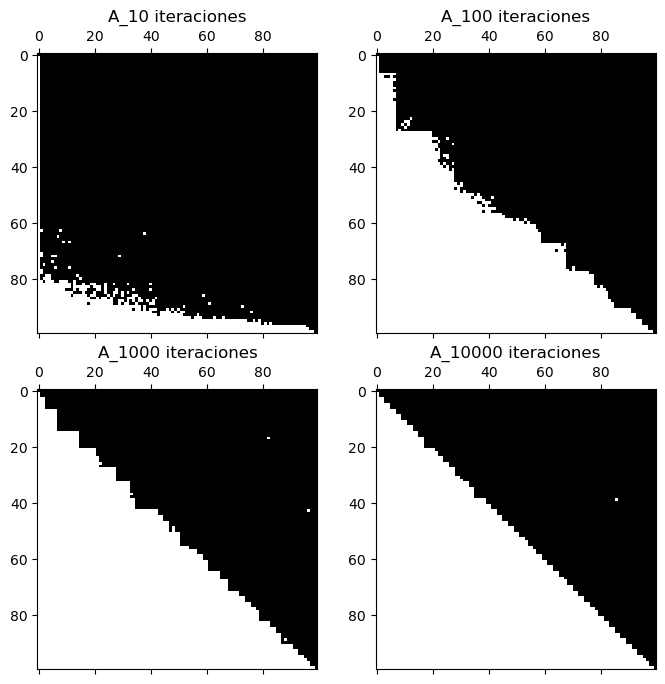

In [80]:
import matplotlib.pyplot as plt
A = np.random.rand(100,100)
for i in range(10000):
    Q,R = np.linalg.qr(A)
    A = np.matmul(R,Q)
    if i==10: 
        A10= A.copy()
    elif i==100: 
        A100= A.copy()
    elif i==1000: 
        A1000= A.copy()
    elif i==9999: 
        A10000= A.copy()
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs[0, 0].spy(abs(A10)>1e-4)
axs[0, 1].spy(abs(A100)>1e-4)
axs[1, 0].spy(abs(A1000)>1e-4)
axs[1, 1].spy(abs(A10000)>1e-4)

axs[0, 0].set_title('A_10 iteraciones')
axs[0, 1].set_title('A_100 iteraciones')
axs[1, 0].set_title('A_1000 iteraciones')
axs[1, 1].set_title('A_10000 iteraciones')

plt.show()


Ahora que nos creemos el algoritmo podemos completarlo para extraer los autovalores y autovectores.

El algoritmo *QR* convierte la matriz $A$ en una triangular superior si todos sus autovalores son reales. Esta matriz triangular es semejante a $A$ y por tanto sus autovalores, situados en la diagonal principal, son los mismos que los de $A$.

El cálculo de los autovectores asociados se puede hacer resolviendo el sistema lineal $(A-\lambda I)\vec{v} = \bf{0}$ o aplicando el método de la potencia inversa a la matriz $A-\lambda I$.


In [81]:
def QR_algorithm(A):
    Q = np.zeros_like(A)
    R = np.zeros_like(A)
    eigvectors = np.zeros_like(A)
    eigvalues = np.zeros(A.shape[0])
    A_copy = A.copy()
    for i in range(10000):
        Q,R = QR_decomposition(A_copy)
        #Q,R = np.linalg.qr(A_copy)
        A_copy = np.matmul(R,Q)
    # los autovalores están en la diagonal de A_copy 
    for i in range(A.shape[0]):
        eigvalues[i], eigvectors[:,i] = potencia_inversa_shift(A, A_copy[i,i])
    return eigvalues, eigvectors

Veamos cómo funciona con un par de ejemplos:


**Matriz simétrica**

\begin{align}
A = 
\begin{pmatrix}
-1 & 0 & 1 & -1 \\
0 & 1 & -1 & 0 \\
1 & -2 & 0 & 1 \\
-1 & 0 & 1 & 2 
\end{pmatrix}
\end{align}

cuyos autovalores son $\lambda_1 = 3. ; \lambda_2 = -2.5141; \lambda_3 =  2.0861$ y $\lambda_4 = -0.5720$.

Al aplicar el algoritmo QR, nos devuelve: 

In [82]:
S = np.array([[-1.,0., 1., -1.],[0., 1., -2., 0],[1., -2., 0., 1],[-1., 0., 1., 2.]])
values,vect = QR_algorithm(S)
print(f'La matriz T de la forma de Schur de A es: \n {tabulate(QR_algorithm_init(S))}')
print('Autovalores QR: ',values)
for i in range(len(values)):
    print(f'Autovector {i+1}: {vect[:,i]}')

La matriz T de la forma de Schur de A es: 
 ------------  -------------  ------------  ------------
3              1.12854e-15    2.06049e-16   1.21419e-17
4.94066e-323  -2.51414       -6.11399e-16   5.8193e-16
1.97626e-323  -6.42285e-323   2.08613       4.64344e-16
0              0              0            -0.571993
------------  -------------  ------------  ------------
Autovalores QR:  [ 3.         -2.51413693  2.0861302  -0.57199327]
Autovector 1: [-1.09323154e-14  5.77350269e-01 -5.77350269e-01 -5.77350269e-01]
Autovector 2: [ 0.6096698  -0.36717314 -0.64514835  0.27797521]
Autovector 3: [-0.332506    0.49189489 -0.26713095  0.75902584]
Autovector 4: [0.71954325 0.5384143  0.42319183 0.11522247]


Se puede ver que la matriz T en la forma de Schur $A = QTQ^T$ es una matriz diagonal como era de esperar. 

Veamos un ejemplo no simétrico:

**Matriz no simétrica**

\begin{align}
A = 
\begin{pmatrix}
3 & 2 & -1 & 1 \\
0 & -1 & 0 & 0 \\
1 & 3 & 2 & 0 \\
0 & 1 & 2 & 0 
\end{pmatrix}
\end{align}

cuyos autovalores son $\lambda_1 = 2.6180 ; \lambda_2 = 2; \lambda_3 =  -1$ y $\lambda_4 = 0.3819$.

En este caso la matriz T en la forma de Schur $A = QTQ^T$ no es una matriz diagonal pero sí triangular superior. 

In [87]:
S = np.array([[3.,2., -1., 1.],[0., -1., 0., 0],[1, 0.3, 2., 0],[0., 1., 2., 0.]])
values,vect = QR_algorithm(S)
print(f'La matriz T de la forma de Schur de A es: \n {tabulate(QR_algorithm_init(S))}')
print('Autovalores QR: ',values)
for i in range(len(values)):
    print(f'Autovector {i+1}: {vect[:,i]}')
    
T,Q = sp.schur(S)
print(f'T= \n {tabulate(T)}')
print(f'Q= \n {tabulate(Q)}')
print(f'Q^-1TQ = \n {tabulate(Q@T@Q.T)}')

La matriz T de la forma de Schur de A es: 
 -------------  -------------  -------------  ---------
 2.61803        1.20414        1.67222        0.487199
-3.95253e-323   2             -0.614403       2.86883
 0             -9.88131e-324  -1             -0.999347
 0              0              4.94066e-324   0.381966
-------------  -------------  -------------  ---------
Autovalores QR:  [ 2.61803399  2.00009997 -1.          0.38196601]
Autovector 1: [4.40828244e-01 6.19456654e-32 7.13275081e-01 5.44893676e-01]
Autovector 2: [ 1.41353708e-04 -0.00000000e+00  7.07106774e-01  7.07106774e-01]
Autovector 3: [-0.18315512  0.70444276 -0.00939257 -0.68565762]
Autovector 4: [-2.90446181e-01  9.58076452e-33  1.79505612e-01  9.39903586e-01]
T= 
 -------  -------  ---------  ---------
2.61803  1.20414  -0.585089  -1.64053
0        2         2.68472   -1.1832
0        0         0.381966  -0.999347
0        0         0         -1
-------  -------  ---------  ---------
Q= 
 ---------  ---------  ----